# Analysis of tweets on education in ChatGPT
## Bi-directional LSTM with RNN Architecture for 3 classes (10 iteration)
Neutral - 0
Positive - 1
Negative - 2


---


The data set : https://drive.google.com/file/d/1Lw3UNB5FCUQqm1Otk7EYBvpDyIHM7ALi/view?usp=drive_link

---


Orgin: https://www.kaggle.com/datasets/nutrientaxis/chatgpt-and-education-tweets-dataset?select=ChatGPT_Education_Tweets_Dataset.csv

In [1]:
! pip install transformers

In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import BertTokenizer, TFBertModel
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk import download
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [4]:
%cd /mydrive/dataset/

/content/gdrive/My Drive/dataset


In [5]:
df_data = pd.read_csv("ChatGPT_Education_Tweets_Dataset.csv")

In [6]:
#labels to integers
df_data['sentiment'] = df_data['sentiment'].replace({'neutral': 0, 'positive': 1, 'negative': 2})

In [7]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'one', 'two','more','chatgpt','chat','gpt','gpt4','username','chatbot'])

In [8]:
def preprocess(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words and word.lower() != 'mor']
    return ' '.join(filtered_words)

In [9]:
df_data['clean'] = df_data['text'].apply(preprocess)

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_data['clean'])
sequences = tokenizer.texts_to_sequences(df_data['clean'])
maxlen = 40
padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')



In [11]:
# Split data into train and test sets 80:20
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, df_data['sentiment'], test_size=0.2)


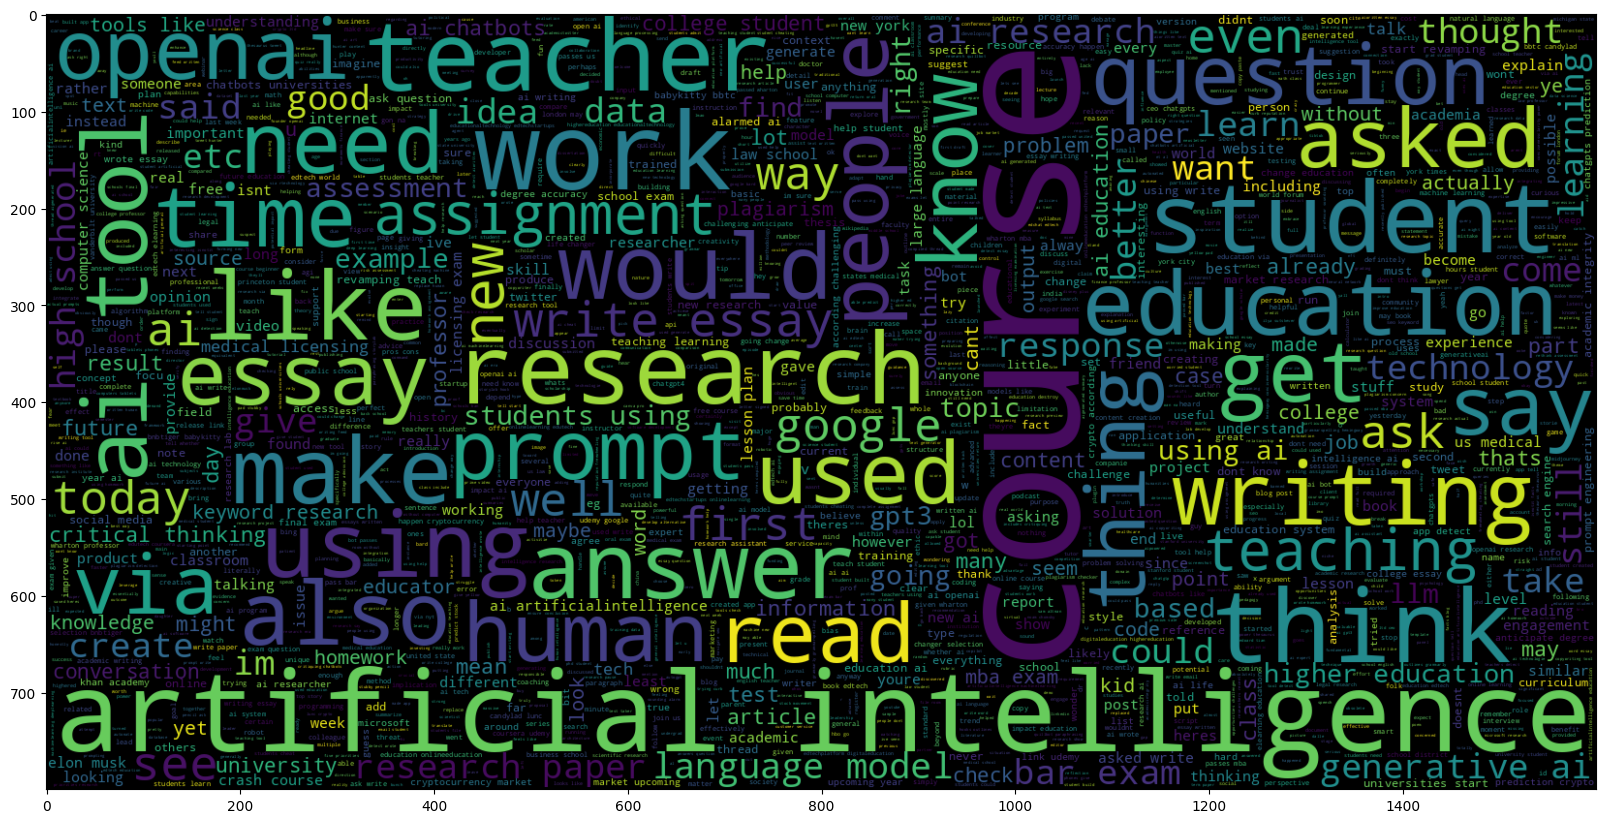

In [12]:
#Neutral sentiment
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df_data[df_data.sentiment==0].clean))
plt.imshow(wc, interpolation = 'bilinear')

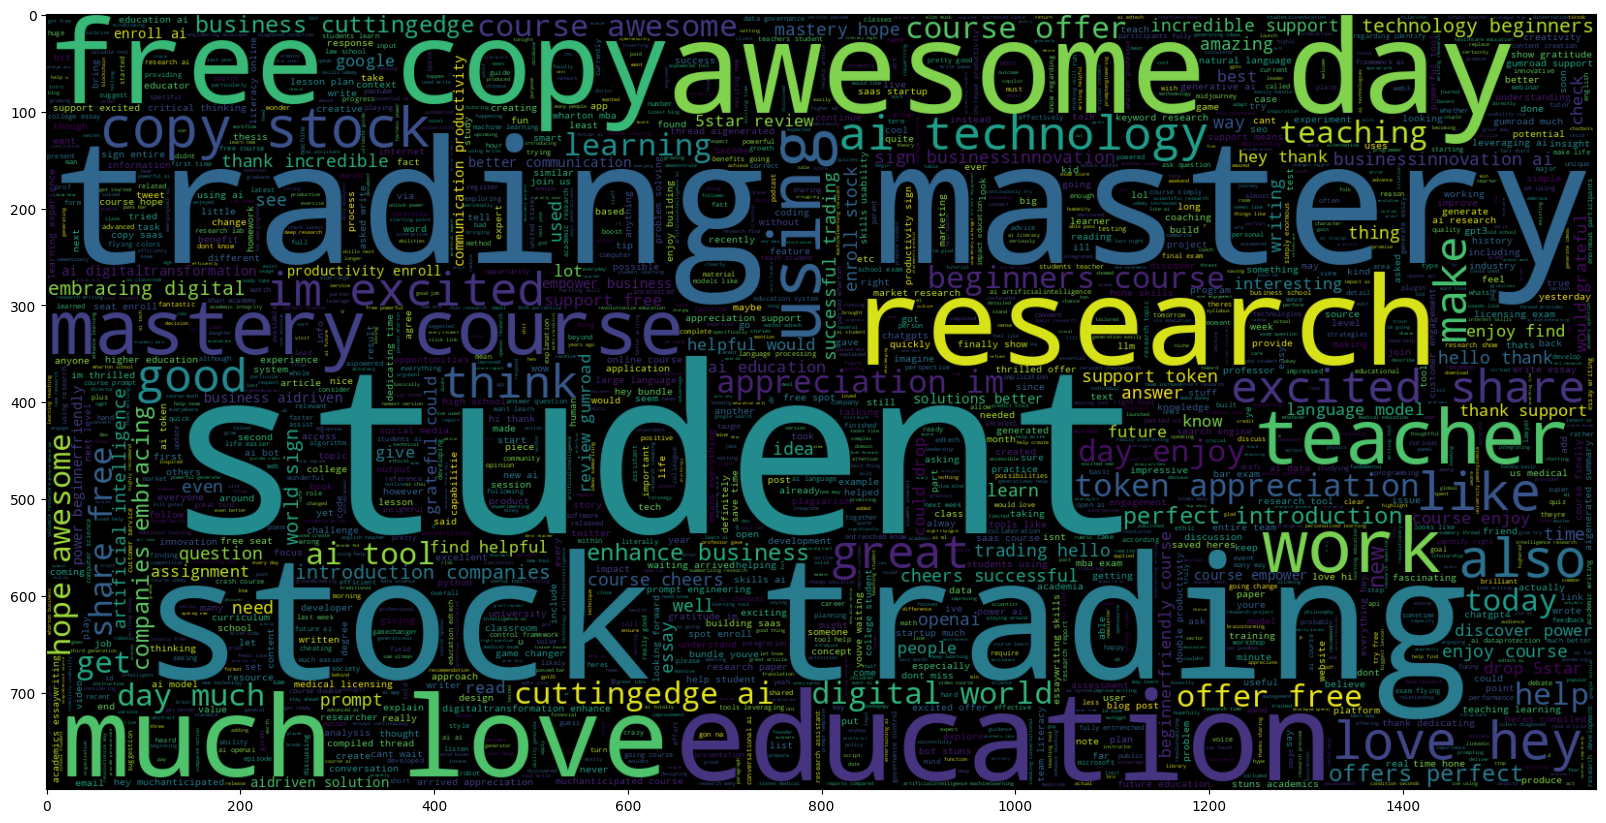

In [13]:
#positive sntiment
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df_data[df_data.sentiment==1].clean))
plt.imshow(wc, interpolation = 'bilinear')

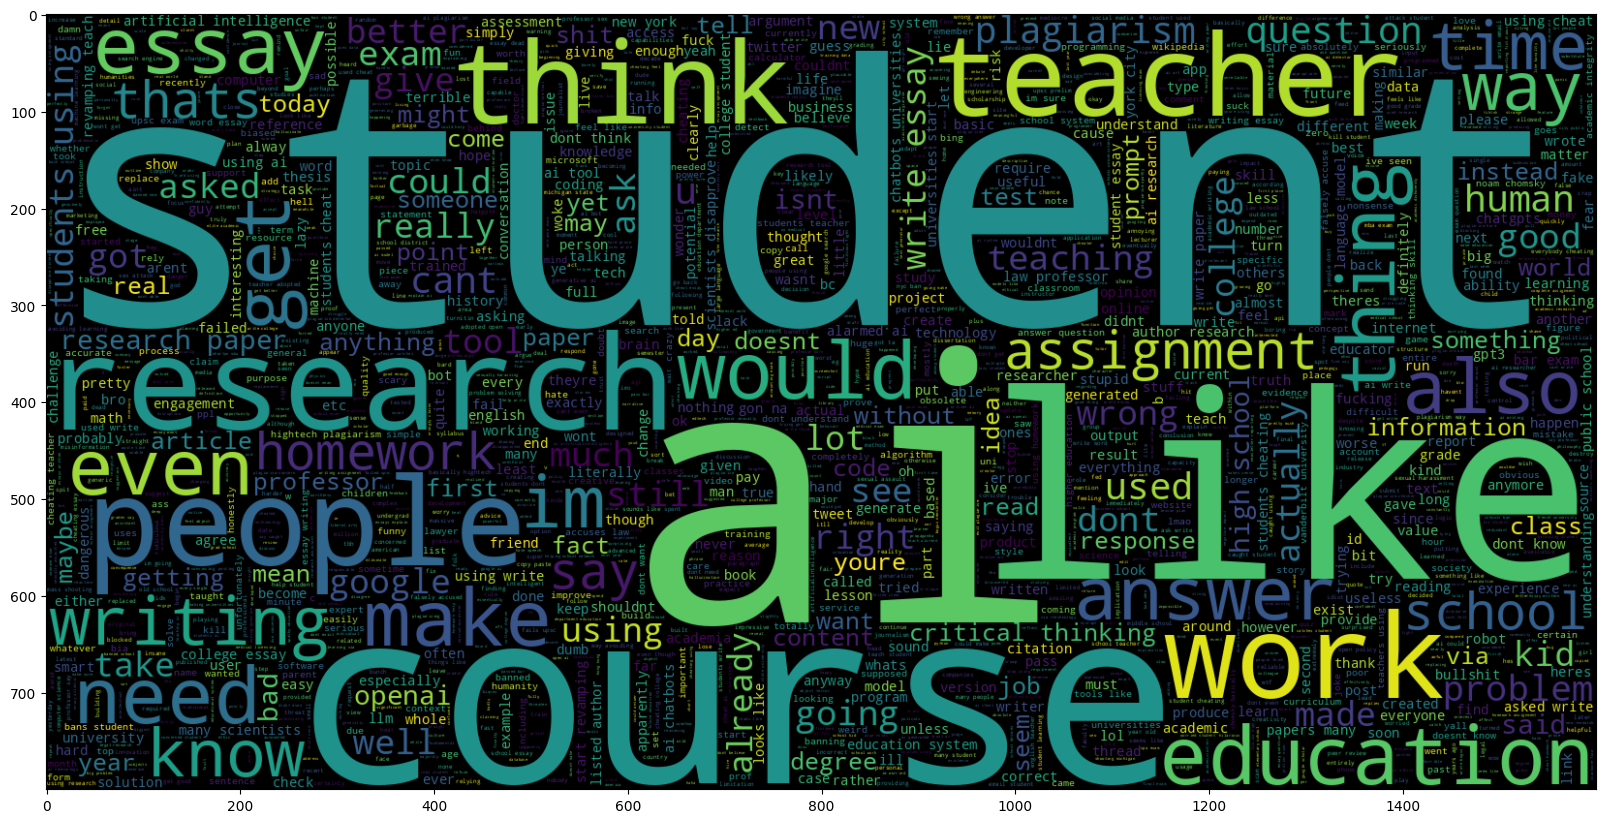

In [14]:
#negative sntiment
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df_data[df_data.sentiment==2].clean))
plt.imshow(wc, interpolation = 'bilinear')

In [15]:

# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_data['clean'])
sequences = tokenizer.texts_to_sequences(df_data['clean'])
maxlen = 40

# Get the total number of unique words
# Adding 1 to account for padding token
total_words = len(tokenizer.word_index) + 1

# Padding the sequences
padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')


In [16]:
# Split data into train and test sets 80:20
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, df_data['sentiment'], test_size=0.2)

In [19]:
# Create a multi-class LSTM model
model = Sequential()
model.add(Embedding(total_words, output_dim=128))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(3, activation='softmax'))  # Output layer with softmax for multi-class classification
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         14867456  
                                                                 
 bidirectional (Bidirectiona  (None, 256)              263168    
 l)                                                              
                                                                 
 dense (Dense)               (None, 3)                 771       
                                                                 
Total params: 15,131,395
Trainable params: 15,131,395
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Train the model
model.fit(x_train, y_train, batch_size=64, validation_split=0.2, epochs=10)


Epoch 1/10
2363/2363 [==============================] - 1564s 659ms/step - loss: 0.6137 - acc: 0.7315 - val_loss: 0.5568 - val_acc: 0.7595
Epoch 2/10
2363/2363 [==============================] - 1477s 625ms/step - loss: 0.4381 - acc: 0.8175 - val_loss: 0.5671 - val_acc: 0.7598
Epoch 3/10
2363/2363 [==============================] - 1490s 631ms/step - loss: 0.3274 - acc: 0.8689 - val_loss: 0.6239 - val_acc: 0.7546
Epoch 4/10
2363/2363 [==============================] - 1488s 630ms/step - loss: 0.2411 - acc: 0.9049 - val_loss: 0.7315 - val_acc: 0.7439
Epoch 5/10
2363/2363 [==============================] - 1474s 624ms/step - loss: 0.1764 - acc: 0.9316 - val_loss: 0.8470 - val_acc: 0.7406
Epoch 6/10
2363/2363 [==============================] - 1440s 609ms/step - loss: 0.1311 - acc: 0.9500 - val_loss: 1.0428 - val_acc: 0.7373
Epoch 7/10
2363/2363 [==============================] - 1411s 597ms/step - loss: 0.1007 - acc: 0.9616 - val_loss: 1.2709 - val_acc: 0.7288
Epoch 8/10
2363/2363 [=====

1477/1477 [==============================] - 79s 52ms/step
Model Accuracy: 0.7312876944238705
Classification Report:
               precision    recall  f1-score   support

     neutral       0.75      0.78      0.77     24396
    positive       0.76      0.70      0.73     13916
    negative       0.63      0.65      0.64      8943

    accuracy                           0.73     47255
   macro avg       0.71      0.71      0.71     47255
weighted avg       0.73      0.73      0.73     47255



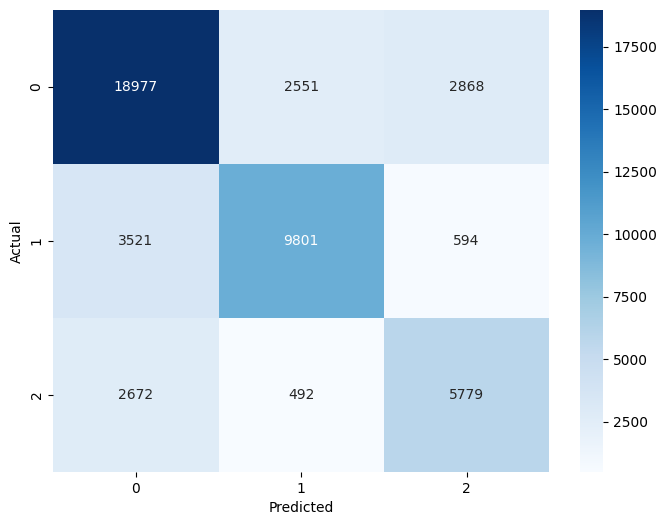

In [21]:
# Classification and Evaluation
predictions = model.predict(x_test)
classification = np.argmax(predictions, axis=1)

accuracy = accuracy_score(y_test, classification)
print("Model Accuracy:", accuracy)

report = classification_report(y_test, classification, target_names=["neutral", "positive", "negative"])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, classification)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


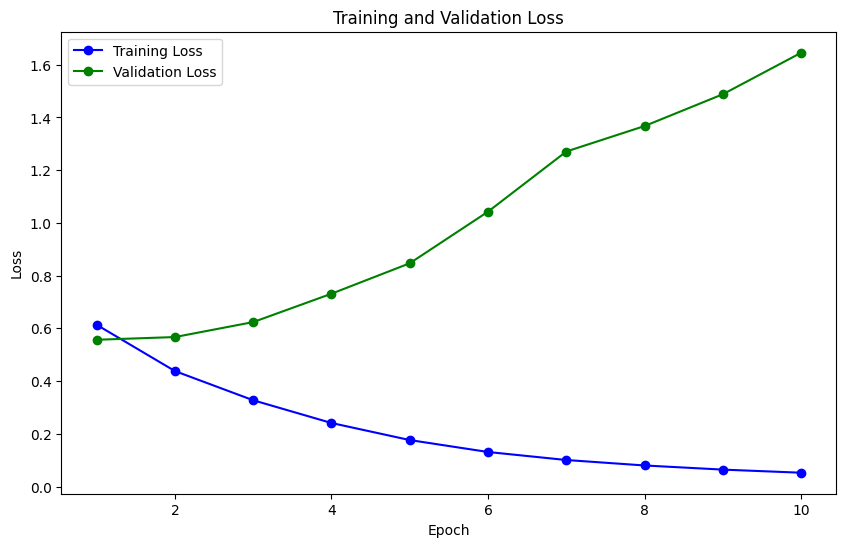

In [23]:
# Actual loss values
train_loss = [0.6137, 0.4381, 0.3274, 0.2411, 0.1764, 0.1311, 0.1007, 0.0800, 0.0643, 0.0525]
val_loss = [0.5568, 0.5671, 0.6239, 0.7315, 0.8470, 1.0428, 1.2709, 1.3676, 1.4882, 1.6456]

# Plot training loss and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), train_loss, 'bo-', label='Training Loss')
plt.plot(range(1, 11), val_loss, 'go-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
